In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  # Jupyter only; remove or comment out if not using notebooks

sns.set(style="whitegrid")  # Prettier plots

UsageError: unrecognized arguments: # Jupyter only; remove or comment out if not using notebooks


<b>1.Loading the dataset </b>

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<b>2. Understanding Distributions</b>

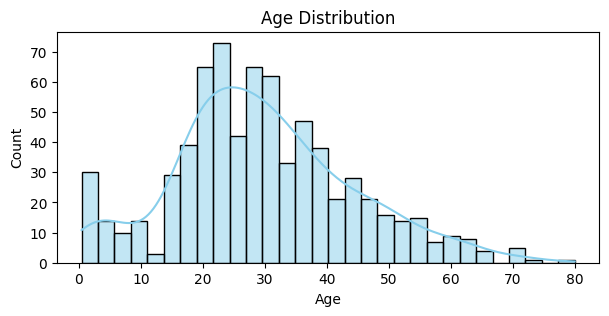

/var/folders/1v/q657715s42sdnd2rpmmct5_r0000gn/T/ipykernel_37402/2171085428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=titanic, palette="Set2")


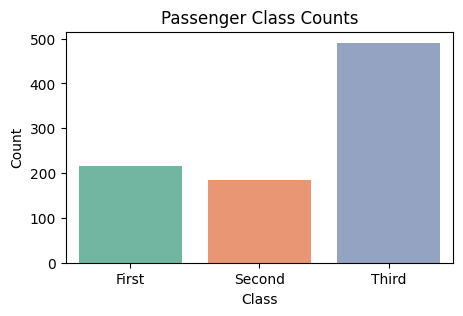

In [4]:
# Numerical: "age"
plt.figure(figsize=(7,3))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Categorical: "class"
plt.figure(figsize=(5,3))
sns.countplot(x="class", data=titanic, palette="Set2")
plt.title('Passenger Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<b>3. Grouped Summaries (Groupings)</b>

Survival Rate by Gender:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


/var/folders/1v/q657715s42sdnd2rpmmct5_r0000gn/T/ipykernel_37402/451266017.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', hue='sex', data=titanic, ci=None)


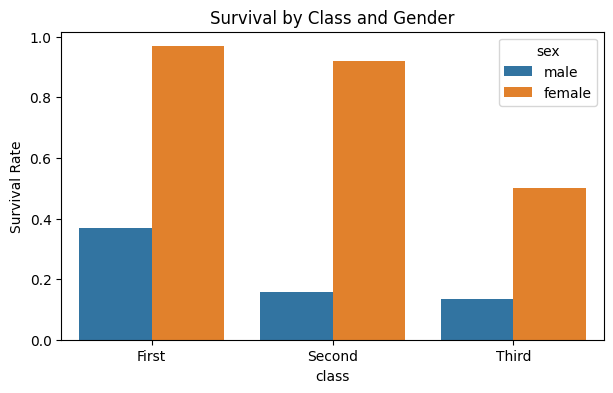

In [5]:
# Survival by gender
grouped = titanic.groupby('sex')['survived'].mean()
print("Survival Rate by Gender:\n", grouped)

# Bar plot: survival rate by class and gender
plt.figure(figsize=(7,4))
sns.barplot(x='class', y='survived', hue='sex', data=titanic, ci=None)
plt.title('Survival by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

<b>Insight:

Women survived at much higher rates. First class passengers had better survival odds.</b>

<b>4. Analyzing Relationships (Correlations)</b>


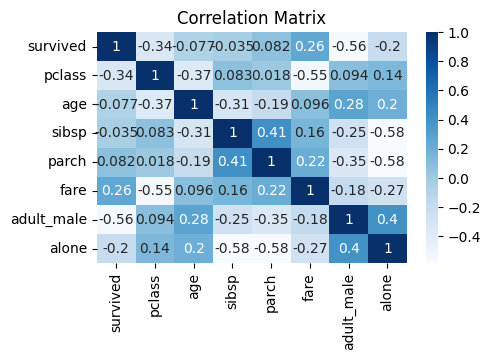

In [9]:
# Correlation matrix (numeric columns)
corr = titanic.corr(numeric_only=True)
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()


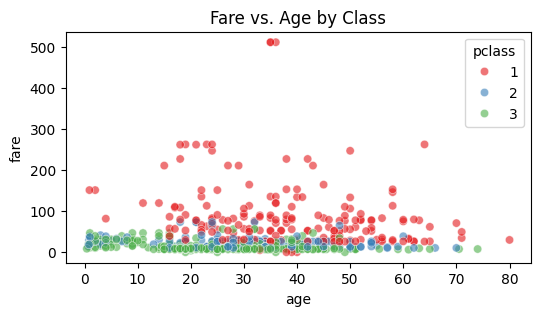

In [10]:
# Fare vs. age scatterplot
plt.figure(figsize=(6,3))
sns.scatterplot(x='age', y='fare', data=titanic, hue='pclass', palette='Set1', alpha=0.6)
plt.title('Fare vs. Age by Class')
plt.show()

In [11]:
# Pivot table: mean survival by class
pivot = pd.pivot_table(titanic, values='survived', index='class', columns='sex')
print("Pivot Table: Mean Survival by Class and Sex\n", pivot)




Pivot Table: Mean Survival by Class and Sex
 sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


/var/folders/1v/q657715s42sdnd2rpmmct5_r0000gn/T/ipykernel_37402/153209494.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(titanic, values='survived', index='class', columns='sex')


<b>Summarize Your EDA Findings</b>

<b>Example summary:</b>

Most passengers are third class; mean age ~30.
Survival rates are much higher for women and for those in first class.
Fare is highly correlated with class, but not with age.
No evidence of strong correlation between age and survival directly.

These findings guide feature selection, suggest where to look for predictive power, and point to the importance of “sex” and “class” for modeling.


<b>🏋️‍♂️ EDA Hands-On Exercise: Predicting Survival on the Titanic</b>

<b>Objective</b>

Perform a complete exploratory data analysis (EDA) on the Titanic dataset. Your goal is to uncover key patterns about what affected passenger survival, visualizing distributions, relationships, and groupings, and documenting your findings with clear summaries.

<b>Instructions</b>


<b>Get the Data</b>

Download the Titanic dataset from Kaggle Titanic Competition (file: train.csv), or load via Seaborn as shown earlier.



<b>Basic Data Exploration</b>

Load the dataset in Pandas.
Display the first 5 and last 5 rows.
Check the dataset shape, column types, and missing values.



<b>Univariate Analysis</b>

Plot the age distribution. What do you notice?
Count the number of females and males.
Plot a bar chart of passengers by ticket class.
Plot a histogram of fares.



<b>Group Comparisons</b>

What was the survival rate for each gender? For each class?
What percentage of minors (age <18) survived, compared to adults?
For each embarkation port, what were average fare and survival rate?



<b>Correlations & Bivariate Analysis</b>

Show the correlation matrix for numeric columns as a heatmap.
Make a scatter plot of fare vs. age, colored by survival.
Make a grouped bar chart showing survival rates by class and gender.



<b>Write a Short EDA Summary</b>

Describe the three most important insights you found.
Suggest two variables you think will be most useful for predicting survival, with a brief justification.




<b>Bonus Challenges</b>

Identify any outliers and hypothesize why they exist.
Engineer a new feature (e.g., “is_child”: 1 if age <12, else 0).
Try the EDA on another Kaggle dataset of your choice and compare results.